In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import json
import os
from PIL import Image

In [ ]:
prompts = [
    """A detailed, high-resolution image of a blue bulbul.""",
    """A detailed, high-resolution image of a blue bulbul, perched elegantly on a sturdy branch of a lush, green tree.""",
    """A detailed, high-resolution image of a blue bulbul, perched elegantly on a sturdy branch of a lush, green tree.
    The bulbul's feathers are covered in rain droplets, reflecting the surrounding environment.""",
    """A detailed, high-resolution image of a blue bulbul, perched elegantly on a sturdy branch of a lush, green tree.
    The bulbul's feathers are covered in rain droplets, reflecting the surrounding environment, adding depth to the scene.""",
]
configurations = [
    "d_res-color",
    "d_res-color-environment",
    "d_res-color-environment-texture",
    "d_res-color-environment-texture-description"
]
totals = [
    50,
    500
]

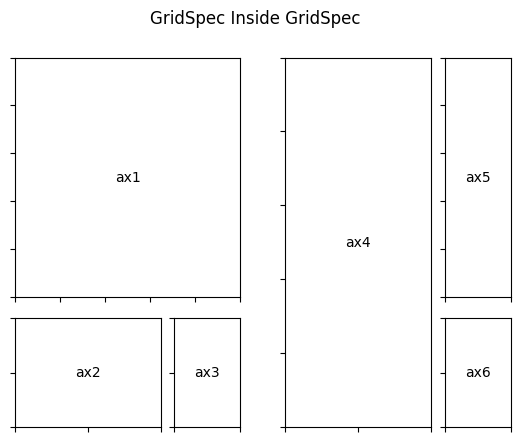

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

# Create a figure
fig = plt.figure()

# Define the outer grid
gs0 = gridspec.GridSpec(1, 2, figure=fig)

# Define the inner grid for the first subplot of the outer grid
gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[0])

# Add subplots to the inner grid
ax1 = fig.add_subplot(gs00[:-1, :])
ax2 = fig.add_subplot(gs00[-1, :-1])
ax3 = fig.add_subplot(gs00[-1, -1])

# Define the inner grid for the second subplot of the outer grid
gs01 = gs0[1].subgridspec(3, 3)

# Add subplots to the second inner grid
ax4 = fig.add_subplot(gs01[:, :-1])
ax5 = fig.add_subplot(gs01[:-1, -1])
ax6 = fig.add_subplot(gs01[-1, -1])

# Format the axes
format_axes(fig)

# Display the figure
plt.suptitle("GridSpec Inside GridSpec")
plt.show()

In [ ]:
def plot_images(images, rows, cols, configurations):
  fig, ax = plt.subplots(rows, cols, figsize=(cols, rows))
  for i in range(rows):
    for j in range(cols):
      index = i*cols+j
      ax[i, j].imshow(images[index])
      ax[i, j].axis("off")
  plt.subplots_adjust(wspace=0, hspace=0)
  # plt.tight_layout()
  plt.show()

def plot_scores(configurations, i_vs, p_vs, configs, repetitions, samples):
  t_reps = len(repetitions)
  t_samps = len(samples)
  t_combs = t_reps * t_samps

  if len(configurations) == 1:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharex=True, sharey=True)
    for col, score in enumerate([(i_vs, configs), (p_vs, configs)]):
      vs_score = score[0]
      y = np.array(vs_score)
      x = np.array([str(sample) for sample in samples])
      print(type(ax))
      ax[col].plot(x, y, 'bd-', label="1 repetition")
      ax[col].set_xlabel("Number of Samples")
      ax[col].set_ylabel(["Inception_VS", "Pixel_VS"][col])
      ax[col].set_title(configurations[0])
      ax[col].yaxis.set_major_locator(ticker.MaxNLocator(10))
      ax[col].yaxis.set_minor_locator(ticker.AutoMinorLocator(1))
    ax[-1].legend()
  else:
    fig, ax = plt.subplots(nrows=2, ncols=len(configurations), figsize=(20, 6), sharex=True, sharey=True)
    for row, score in enumerate([(i_vs, configs), (p_vs, configs)]):
      vs_score = score[0]
      confs = score[1]
      for column in range(len(configurations)):
        if column == 0:
          y = np.array([vs_score[i:i+t_reps] for i in range(0, t_combs, t_reps)]).T
          cnfs = np.array([configs[i:i+t_reps] for i in range(0, t_combs, t_reps)]).T
        else:
          col = t_combs * column
          endcol = len(vs_score) if col + t_combs >= len(vs_score) else col + t_combs
          y = np.array([vs_score[i:i+t_reps] for i in range(col, endcol, t_reps)]).T
          cnfs = np.array([configs[i:i+t_reps] for i in range(col, endcol, t_reps)]).T

        x = np.array([[i for _ in range(t_reps)] for i in samples]).T
        for index, ind_data in enumerate(zip(repetitions, ['bd-', 'yo-', 'g^-', 'rs-', '>-'])):
          rep, mark = ind_data
          ax[row, column].plot(x[index], y[index], mark, label=f"{rep} repetitions")
          ax[1, column].set_xlabel('Number of Samples')
          ax[row, 0].set_ylabel(["Inception_VS", "Pixel_VS"][row])
          ax[0, column].set_title(f"{cnfs[index][0]}")
          ax[row, column].yaxis.set_major_locator(ticker.MaxNLocator(10))
          ax[row, column].yaxis.set_minor_locator(ticker.AutoMinorLocator(1))
      ax[-1, -1].legend()
  plt.show()

In [ ]:
def get_vendi_score(configurations, vendi_scores, samples, repetitions):
  vs_data = []
  for configuration in configurations:
    for vendi_score in vendi_scores:
      if vendi_score["configuration"] == configuration:
        for no_samples in samples:
          for no_rep in repetitions:
            for config_score in vendi_score["config_scores"]:
              if config_score["samples"] == no_samples and config_score["repetitions"] == no_rep:
                inception_vs = config_score["scores"]["inception_vs"]
                pixel_vs = config_score["scores"]["pixel_vs"]
                vs_data.append((inception_vs, pixel_vs, configuration))
        break
  return vs_data

Configuration:
d_res-color
Prompt:
A detailed, high-resolution image of a blue bulbul.


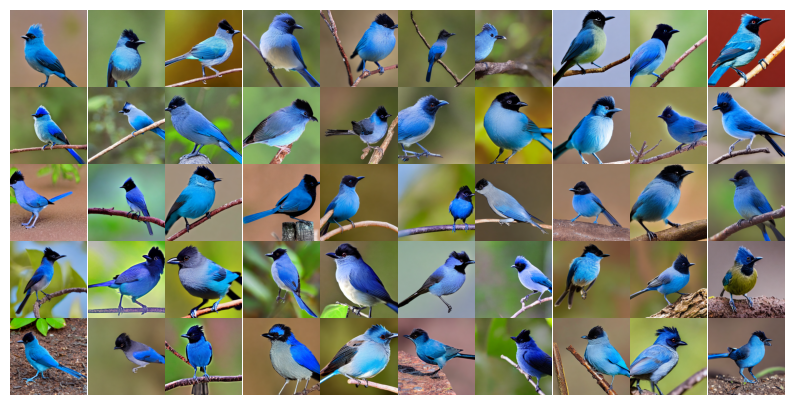

Configuration:
d_res-color-environment
Prompt:
A detailed, high-resolution image of a blue bulbul, perched elegantly on a sturdy branch of a lush, green tree.


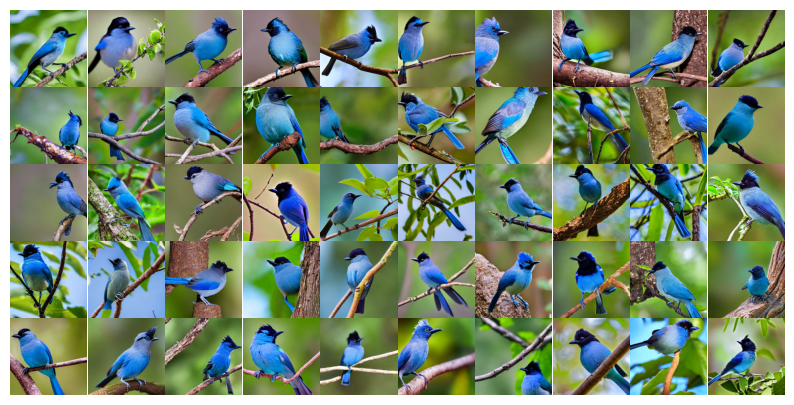

Configuration:
d_res-color-environment-texture
Prompt:
A detailed, high-resolution image of a blue bulbul, perched elegantly on a sturdy branch of a lush, green tree.
    The bulbul's feathers are covered in rain droplets, reflecting the surrounding environment.


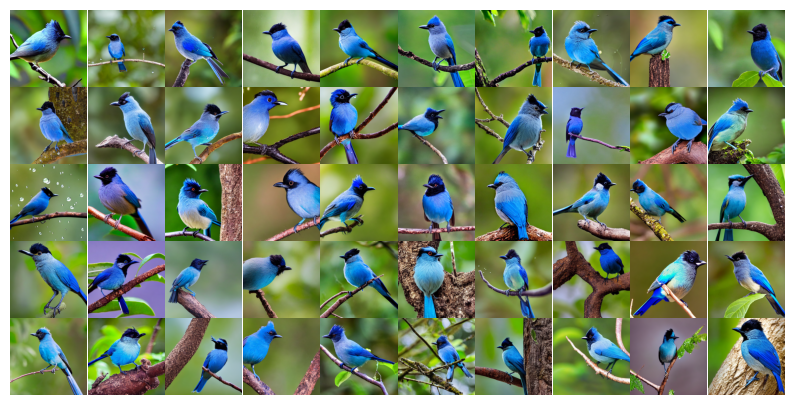

Configuration:
d_res-color-environment-texture-description
Prompt:
A detailed, high-resolution image of a blue bulbul, perched elegantly on a sturdy branch of a lush, green tree.
    The bulbul's feathers are covered in rain droplets, reflecting the surrounding environment, adding depth to the scene.


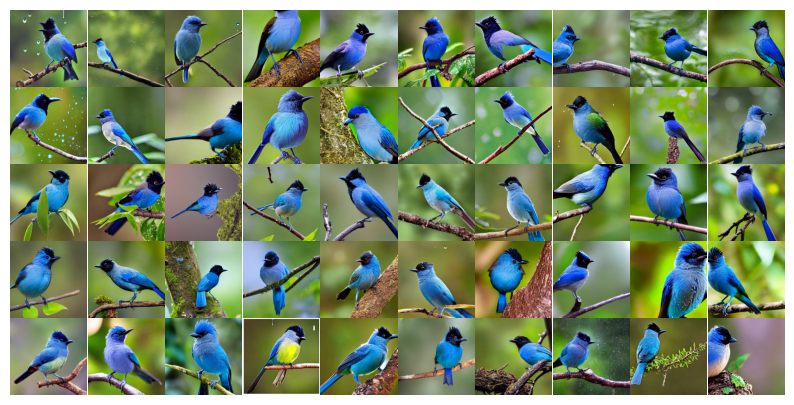

In [ ]:
for configuration, prompt in zip(configurations, prompts):
  print(f"Configuration:\n{configuration}\nPrompt:\n{prompt}")
  paths = os.listdir(f"/content/drive/MyDrive/cv/{configuration}_50")
  images = [Image.open(f"/content/drive/MyDrive/cv/{configuration}_50/{path}") for path in paths]
  plot_images(images, 5, 10, configurations)

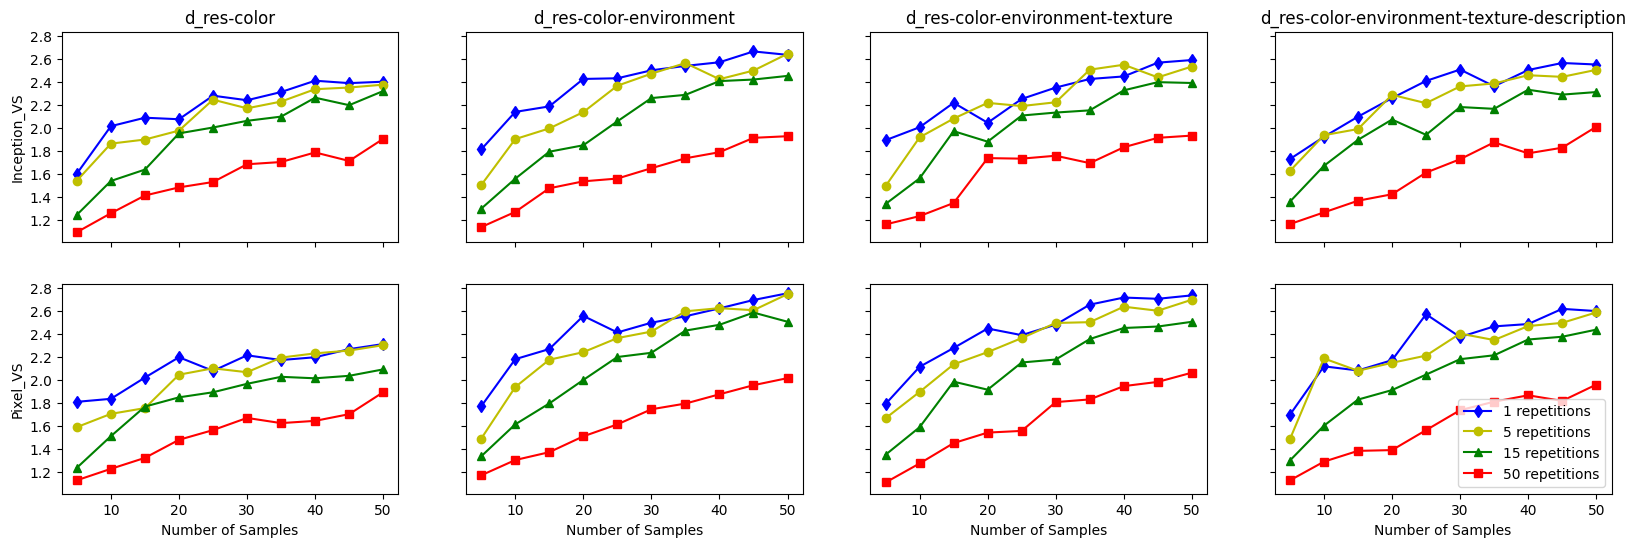

In [ ]:
with open("/content/drive/MyDrive/cv/i_vs-p_vs-all_configs-2.jsonl", "r") as jsonfile:
  vendi_scores = json.load(jsonfile)

samples = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
repetitions = [1, 5, 15, 50]

vs_data = get_vendi_score(configurations, vendi_scores, samples, repetitions)

i_vs = [float(data[0]) for data in vs_data]
p_vs = [float(data[1]) for data in vs_data]
configs = [config[2] for config in vs_data]

plot_scores(configurations, i_vs, p_vs, configs, repetitions, samples)

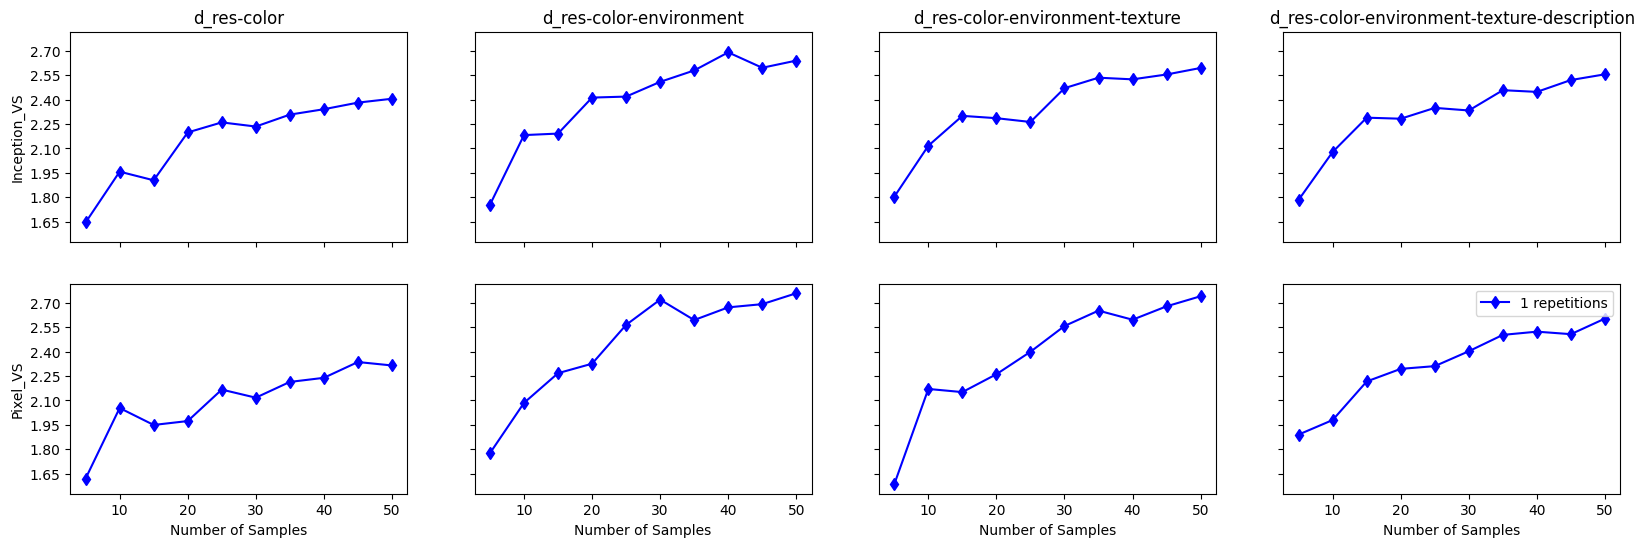

In [ ]:
with open("/content/drive/MyDrive/cv/i_vs-p_vs-all_configs-3.jsonl", "r") as jsonfile:
  vendi_scores = json.load(jsonfile)

samples = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
repetitions = [1]

vs_data = get_vendi_score(configurations, vendi_scores, samples, repetitions)

i_vs = [float(data[0]) for data in vs_data]
p_vs = [float(data[1]) for data in vs_data]
configs = [config[2] for config in vs_data]

plot_scores(configurations, i_vs, p_vs, configs, repetitions, samples)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


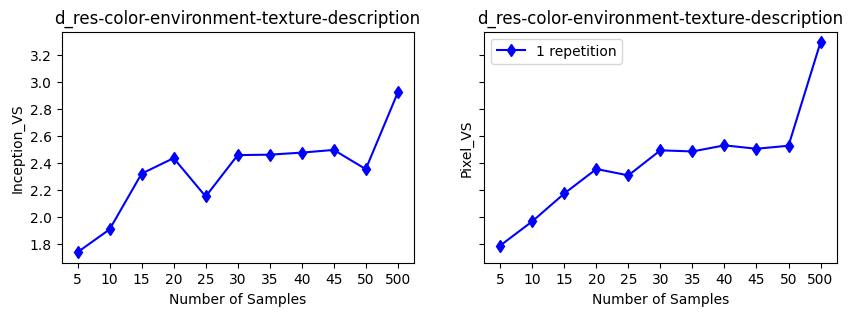

In [ ]:
with open("/content/drive/MyDrive/cv/i_vs-p_vs-all_configs-4.jsonl", "r") as jsonfile:
  vendi_scores = json.load(jsonfile)

samples = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 500]
repetitions = [1]

vs_data = get_vendi_score([configurations[-1]], vendi_scores, samples, repetitions)

i_vs = [float(data[0]) for data in vs_data]
p_vs = [float(data[1]) for data in vs_data]
configs = [config[2] for config in vs_data]

plot_scores([configurations[-1]], i_vs, p_vs, configs, repetitions, samples)